In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

social_N_data = pd.read_csv('Social_Network_Ads.csv')
pd.concat([social_N_data.head(), social_N_data.tail()])

#CHECK FOR NULL VALUES
social_N_data.isnull().any()

# CLEAN THE DATA
social_N_data.drop('User ID', axis=1, inplace=True)

social_N_data.head(5)



,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [2]:
GT= pd.get_dummies(social_N_data['Gender']).astype(int)
social_N_data.drop('Gender',axis=1,inplace=True)
social_N_data= pd.concat([social_N_data,GT],axis=1)
social_N_data.head(5)

,Age,EstimatedSalary,Purchased,Female,Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [3]:
X = social_N_data.iloc[:,[0,1,3,4]] # Age, EstimatedSalary and Male
X.head()

,Age,EstimatedSalary,Female,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


In [4]:
y = social_N_data.iloc[:, 2] # Purchased
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [5]:


# SPLIT DATA TO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [6]:
# FIT/TRAIN MODEL
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(360, 4)
(40, 4)
(360,)
(40,)


Câu 1: Hãy cho biết số góc của biến độc lập tương ứng với lương trong mông hình huấn luyện

In [8]:
# Lấy hệ số của mô hình
coefficients = classifier.coef_
coefficients
 #d

array([[ 2.15710207,  1.08622979, -0.07985882,  0.07985882]])

Câu 2: hãy cho biết giá trị tuổi của dòng dữ liệu cuối cùng của tập dữu liệu đầu vào của tập dữu liệu train

In [9]:
social_N_data.head(5)

,Age,EstimatedSalary,Purchased,Female,Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [10]:
# Lấy giá trị tuổi của dòng cuối cùng
last_row_age = X_train[:-1][0]

# In giá trị tuổi
print(f"Giá trị tuổi của dòng cuối cùng trong tập dữ liệu huấn luyện: {last_row_age}")


Giá trị tuổi của dòng cuối cùng trong tập dữ liệu huấn luyện: [ 0.33691032 -0.74152357 -1.03390789  1.03390789]


In [11]:
X_train

array([[ 0.33691032, -0.74152357, -1.03390789,  1.03390789],
       [ 0.71801862, -0.74152357,  0.96720415, -0.96720415],
       [-1.28279995, -1.50473675, -1.03390789,  1.03390789],
       ...,
       [-0.80641458,  0.28587878, -1.03390789,  1.03390789],
       [ 0.14635617, -0.27185393,  0.96720415, -0.96720415],
       [ 0.4321874 ,  1.10780067,  0.96720415, -0.96720415]])

Câu 3: Hãy cho biết giá trị đầu ra của dòng cuối cùng trên tập dữ liệu train

In [12]:
# Sử dụng chỉ số âm để lấy giá trị đầu ra của dòng cuối cùng
last_row_output = y_train.iloc[-1]

# In giá trị đầu ra
print(f"Giá trị đầu ra của dòng cuối cùng trong tập dữ liệu huấn luyện: {last_row_output}")

Giá trị đầu ra của dòng cuối cùng trong tập dữ liệu huấn luyện: 1


Câu 4: Giá trị chính xác với threshod=0.45 là bao nhiêu

In [13]:
df_test_new_threshold= (classifier.predict_proba(X_test)[:, 1] >= 0.45).astype(int)
df_test_new_threshold

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, df_test_new_threshold)

0.9

In [15]:
# Dự đoán xác suất
y_prob = classifier.predict_proba(X_test)[:, 1]

# Dự đoán nhãn dựa trên ngưỡng 0.45
y_pred = (y_prob > 0.45).astype(int)

# Tính giá trị chính xác
accuracy = accuracy_score(y_test, y_pred)

# In giá trị chính xác
print(f"Giá trị chính xác với threshold=0.45: {accuracy}")

Giá trị chính xác với threshold=0.45: 0.9


Câu 5: StandardScaler trên tập dữu liệu input đầu vào

In [16]:
X_train

array([[ 0.33691032, -0.74152357, -1.03390789,  1.03390789],
       [ 0.71801862, -0.74152357,  0.96720415, -0.96720415],
       [-1.28279995, -1.50473675, -1.03390789,  1.03390789],
       ...,
       [-0.80641458,  0.28587878, -1.03390789,  1.03390789],
       [ 0.14635617, -0.27185393,  0.96720415, -0.96720415],
       [ 0.4321874 ,  1.10780067,  0.96720415, -0.96720415]])

Câu 6: Hãy cho biết với giới tính nữ , tuổi 46, lương 49000 thì người dùng này có mua hàng hay không với ngưỡng là 0.45

In [17]:
# Chuẩn bị dữ liệu cho dự đoán
new_data = pd.DataFrame({'Age': [46], 'EstimatedSalary': [49000], 'Female': [1], 'Male': [0]})

# Chuẩn hóa dữ liệu mới với cùng một StandardScaler đã sử dụng trước đó
new_data_scaled = sc.transform(new_data)

# Dự đoán xác suất
prediction_proba = classifier.predict_proba(new_data_scaled)[:, 1]

# Dự đoán nhãn dựa trên ngưỡng 0.45
prediction_label = (prediction_proba > 0.45).astype(int)

# In kết quả
print(f"Xác suất mua hàng: {prediction_proba[0]}")
print(f"Dự đoán mua hàng (với ngưỡng 0.45): {prediction_label[0]}")

#Có 

Xác suất mua hàng: 0.46551401652598995
Dự đoán mua hàng (với ngưỡng 0.45): 1


Câu 7: Hãy cho biết giá trị output sau khi đi qua hàm sigmod của dòng đầu tiên trên tập test

In [18]:
# Predict output on the test set
y_pred = classifier.predict(X_test)

# Extract predicted output for the first row
first_row_pred = y_pred[0]

print("Predicted output after sigmoid function for the first row:")
print(f"Predicted Output: {first_row_pred}")

Predicted output after sigmoid function for the first row:
Predicted Output: 0


Câu 8: Giá trị(TP , TN) với threshold mặc định là bao nhiêu

In [19]:
y_pred_test= classifier.predict(X_test)
y_pred_test

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix

cf_amtrix= confusion_matrix(y_test, y_pred_test)
cf_amtrix

array([[24,  2],
       [ 1, 13]], dtype=int64)

In [21]:
# Dự đoán xác suất cho tập kiểm thử
y_prob_test = classifier.predict_proba(X_test)[:, 1]

# Áp dụng ngưỡng 0.5 để dự đoán nhãn
y_pred_default_threshold = (y_prob_test > 0.5).astype(int)

# Tính giá trị True Positives và True Negatives
TP = np.sum((y_pred_default_threshold == 1) & (y_test == 1))
TN = np.sum((y_pred_default_threshold == 0) & (y_test == 0))

print(f"True Positives (TP) với ngưỡng mặc định: {TP}")
print(f"True Negatives (TN) với ngưỡng mặc định: {TN}")

True Positives (TP) với ngưỡng mặc định: 13
True Negatives (TN) với ngưỡng mặc định: 24


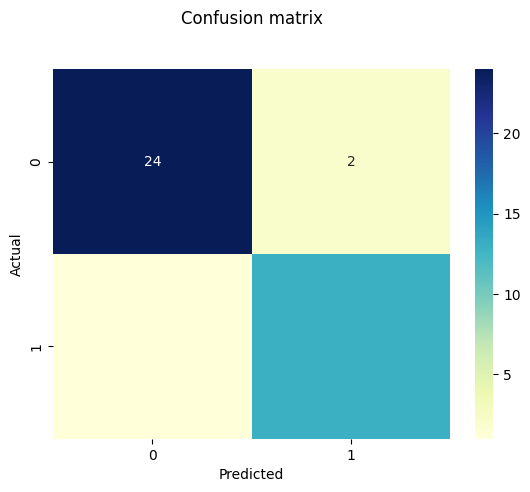

In [22]:
sns.heatmap(pd.DataFrame(cf_amtrix),
            annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel("Actual")
plt.xlabel('Predicted')
plt.show()
#==>24, 13

Câu 9: Viết thiết lập threshold trong mô hình phân lớp Logistic regression sẽ như thế nào nếu giá trị thresshold càng nhỏ khi so sánh với ngưỡng mặc định

Câu 10:  Hãy chi biết ngưỡng mặc định của giải thuật Logistic Regression trong python là bao nhiêu

In [35]:
# 0.5
X_test[0:1]

array([[ 0.4321874 , -0.15443651, -1.03390789,  1.03390789]])

Câu 11: Hãy cho biết giá trị đầu ra của dòng đầu tiên trước khi đi qua hàm sigmod trong mô hình trên tập test là bao nhiêu

In [24]:
# Dự đoán giá trị trước khi áp dụng hàm sigmoid
decision_function_output = classifier.decision_function(X_test[0:1])

print(f'Giá trị đầu ra trước khi đi qua hàm sigmoid: {decision_function_output[0]}')

Giá trị đầu ra trước khi đi qua hàm sigmoid: -0.13047076692733084


Câu 12: Hãy cho biết giá trị tương ứng của tuổi 46, lương 49000 và là nữ thì đi qua hàm chuẩn hóa dữ liệu sẽ trở thành giá trị là bao nhiêu

In [25]:
# Tạo DataFrame mới với dữ liệu cần chuẩn hóa
new_data_to_scale = pd.DataFrame({'Age': [46], 'EstimatedSalary': [49000],  'Female': [1], 'Male': [0],})

# Chuẩn hóa dữ liệu mới
scaled_data = sc.transform(new_data_to_scale)

# In giá trị sau khi chuẩn hóa
print(f'Giá trị sau khi chuẩn hóa: {scaled_data}')

Giá trị sau khi chuẩn hóa: [[ 0.8132957  -0.62410616  0.96720415 -0.96720415]]


Câu 13: Nếu áp ngưỡng (theshold = 0.45) cho giá trị đầu sau khi đi qua hàm sigmod của dòng đầu tiên trong tập kiểm thử thì giá trị dự báo sẽ là bao nhiêu

In [26]:
# Dự đoán xác suất sử dụng mô hình cho dòng đầu tiên trong tập test
y_pred = classifier.predict(X_test[0:1])

# Áp dụng hàm sigmoid cho kết quả dự đoán
y_pred_sigmoid = 1 / (1 + np.exp(-y_pred))

# So sánh với ngưỡng 0.45
if y_pred_sigmoid >= 0.45:
    prediction = 1  # Mua hàng
else:
    prediction = 0  # Không mua hàng

print("Giá trị dự báo với ngưỡng 0.45:", prediction)

Giá trị dự báo với ngưỡng 0.45: 1


Câu 14: Giá trị độ chính xác với threshold măc định là bao nhiêu

In [27]:
from sklearn.metrics import accuracy_score

# Dự đoán các giá trị trên tập test
y_pred = classifier.predict(X_test)

# Tính độ chính xác với ngưỡng mặc định (0.5)
accuracy = accuracy_score(y_test, y_pred)

print("Độ chính xác với ngưỡng mặc định (0.5):", accuracy)

Độ chính xác với ngưỡng mặc định (0.5): 0.925


Câu 15: Giá trị(TP, TN) với threshold = 0.45 là bao nhiêu

In [28]:
from sklearn.metrics import confusion_matrix

# Dự đoán các giá trị trên tập test với ngưỡng threshold = 0.45
y_pred = (classifier.predict_proba(X_test)[:, 1] >= 0.45).astype(int)

# Tính ma trận nhầm lẫn (confusion matrix)
confusion = confusion_matrix(y_test, y_pred)

# Trích xuất giá trị TP và TN từ ma trận nhầm lẫn
TP = confusion[1, 1]  # True Positives
TN = confusion[0, 0]  # True Negatives

print("True Positives (TP) với ngưỡng 0.45:", TP)
print("True Negatives (TN) với ngưỡng 0.45:", TN)

True Positives (TP) với ngưỡng 0.45: 13
True Negatives (TN) với ngưỡng 0.45: 23


Câu 16: Tương ứng với giá trị của tuổi, giới tính của giá trị sau khi chuẩn hóa(0.89257019, -0.66783025, -0.98019606) thì khi suy ngược lại ta sẽ có tương ứng tuổi , lướng , giới tính là 

In [29]:
new_data1 = pd.DataFrame({'Age': [45], 'EstimatedSalary': [48500], 'Female': [1], 'Male': [0]})

# Áp dụng chuẩn hóa dữ liệu
new_data_scaled1 = sc.transform(new_data1)

print("Giá trị sau khi chuẩn hóa dữ liệu:", new_data_scaled1)

#còn đáp án e không có nên không thử. Chắc e á

Giá trị sau khi chuẩn hóa dữ liệu: [[ 0.71801862 -0.63878334  0.96720415 -0.96720415]]


Câu 17: Hãy cho biết với giới tính là nữ, tuổi là 46, lương là 49000 thì người này có mua hàng hay không với ngưỡng mặc định

In [30]:
new_data = pd.DataFrame({'Age': [46], 'EstimatedSalary': [49000], 'Female': [1], 'Male': [0]})  # Giới tính 0 cho nữ

# Dự đoán sử dụng mô hình với ngưỡng mặc định (0.5)
prediction = classifier.predict(new_data)

if prediction[0] == 1:
    print("Người dùng có thể mua hàng.")
else:
    print("Người dùng không mua hàng.")

Người dùng có thể mua hàng.


c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [31]:
# Tạo DataFrame mới với dữ liệu cần dự đoán
new_data_to_predict = pd.DataFrame({'Age': [46], 'EstimatedSalary': [49000], 'Female': [1], 'Male': [0]})

# Chuẩn hóa dữ liệu mới
scaled_data_to_predict = sc.transform(new_data_to_predict)

# Dự đoán xác suất mua hàng
probability_of_purchase = classifier.predict_proba(scaled_data_to_predict)[:, 1]

# Áp dụng ngưỡng mặc định (0.5) để dự đoán nhãn
prediction_default_threshold = (probability_of_purchase > 0.5).astype(int)

# In dự đoán
print(f"Xác suất mua hàng: {probability_of_purchase[0]}")
print(f"Dự đoán mua hàng (với ngưỡng 0.5): {prediction_default_threshold[0]}")

Xác suất mua hàng: 0.46551401652598995
Dự đoán mua hàng (với ngưỡng 0.5): 0


Câu 18: Hãy cho biết kích thước của tập dữ liệu kiểm thử

In [32]:
print(X_test.shape)


(40, 4)


Câu 19: hãy cho biết dòng kết quả dự báo cuối cùng cho giá trị mua hàng trong tập dữ liệu test

In [33]:
# Lấy giá trị dự báo cuối cùng cho giá trị mua hàng trong tập dữ liệu kiểm thử
last_prediction = y_test.iloc[-1]
print("Dự báo cuối cùng cho giá trị mua hàng trong tập dữ liệu kiểm thử:", last_prediction)

Dự báo cuối cùng cho giá trị mua hàng trong tập dữ liệu kiểm thử: 0


Câu 20: Hãy cho biết hệ số tự do trong mô hình huấn luyện

In [34]:
classifier.intercept_ 

array([-1.06012288])